#### 폰트 설정

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 서울시 상권분석 서비스에서 전처리 한 최종 데이터 파일 last.csv 파일 불러오기
# 군집화 완료한 cluster1부터 cluster5까지 불러오기

In [2]:
import pandas as pd
a = pd.read_csv("last.csv")

In [3]:
#군집화를 완료한 cluster1부터 cluster5파일을 각각 변수에 저장
cluster1 = pd.read_csv("cluster1.csv")
cluster2 = pd.read_csv("cluster2.csv")
cluster3 = pd.read_csv("cluster3.csv")
cluster4 = pd.read_csv("cluster4.csv")
cluster5 = pd.read_csv("cluster5.csv")

# 아래는 클러스터 3을 사용한 모델링 예시
# 클러스터 1부터 클러스터 5까지 동일한 코드 과정을 적용
#### 다른 클러스터로 진행하고자 할 때는 변수 이름만 변경하여 동일한 코드 과정을 수행

In [4]:
# 클러스터 3에서 '상권_코드' 열만 선택하여 변수 result에 저장
# 클러스터 1부터 5까지 동일한 코드 과정을 수행

#result = cluster1[['상권코드']]
#result = cluster2[['상권코드']]
result = cluster3[['상권_코드']]
#result = cluster4[['상권코드']]
#result = cluster5[['상권코드']]

# 모델링에 사용할 데이터 전처리

In [5]:
# result와 a 데이터프레임을 '상권_코드' 열을 기준으로 inner 방식으로 병합하여 data_df를 생성
data_df = pd.merge(result, a, on='상권_코드', how='inner')

In [6]:
# 데이터프레임의 출력 시 최대 열(column) 수 제한을 해제하여 모든 열이 출력되도록 설정
pd.set_option('display.max_columns', None)

# 데이터프레임 data_df를 출력할 때 모든 열이 출력되도록 설정한 후 사용
data_df

,상권_코드,월_평균_소득_금액,소득_구간_코드,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,교육_amount,기타_개인_서비스_amount,보건_amount,소매업_amount,스포츠_및_오락관련_서비스업_amount,식료품_amount,음료_amount,음식점_amount,의류_미용_amount,주점업_amount,교육_prob,기타_개인_서비스_prob,보건_prob,소매업_prob,스포츠_및_오락관련_서비스업_prob,식료품_prob,음료_prob,음식점_prob,의류_미용_prob,주점업_prob,1년생존율,3년생존율,5년생존율,전체_임대료,1층_임대료,1층외_임대료,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2110003,3.540374e+06,7.0000,115.5625,57.8750,110.1875,53.5625,3218.0625,1526.0000,1692.0625,571.1875,453.5625,388.8125,529.0625,560.0625,715.3750,279.0625,244.8750,185.1250,233.8125,253.5625,329.5625,292.1250,208.6875,203.6875,295.2500,306.5000,385.8125,1244.6250,33.5000,1211.1250,411.9375,261.7500,150.1875,4.1875,42.5625,73.2500,127.6250,106.6875,57.6250,3.8750,24.7500,35.9375,82.9375,73.6250,40.6250,0.3125,17.8125,37.3125,44.6875,33.0625,17.0000,3.421282e+05,1.537188e+05,1.884097e+05,61143.8750,39969.1875,37309.6250,53728.875,54121.3125,95855.3125,1.052731e+05,73433.5000,36685.8750,34801.3125,47937.6250,43996.8750,48700.5625,48607.8125,48828.6875,48644.1875,47976.2500,49313.8125,50057.1250,2.570594e+09,2.629855e+09,3.105969e+09,2.650945e+09,1.604390e+09,9.002155e+09,4.420813e+09,2.158432e+09,2.501789e+09,3.406235e+09,0.075,0.077,0.091,0.078,0.047,0.264,0.130,0.063,0.073,0.100,79.200,58.200,46.875,86738.2500,101398.8125,72077.7500,3.659061,3.896322,2.346379,0.097786,2.423579,0.090109,0.237261,9.517195e+07,6104.032655,81.482669,18.604009,16.241665,16.602757,15.800060,16.347519,16.691973,12.700931,5.937781,2.804299,7.864810,21.069751,30.280496,28.790049,9.437145,49.602730,50.496964,1.976289,10.252862,13.397967,31.206866,21.985848,21.430900,7.167959e+07,2.349236e+07,1.414168e+07,1.396202e+07,1.419724e+07,1.412819e+07,1.525046e+07,1.477640e+07,8.715961e+06,4.815775e+06,9.258800e+06,1.929088e+07,2.226164e+07,2.623163e+07,1.331324e+07,4.663503e+07,4.175083e+07,1.231930e+06,1.049237e+07,1.267746e+07,2.256741e+07,2.115200e+07,2.026415e+07,4487.953351,1616.079304,919.092482,883.028739,881.980047,874.686228,929.165855

In [7]:
# 교통시설 수를 나타내는 컬럼을 생성하고 열들을 더하여 값 할당
data_df['교통시설수'] = data_df['공항_수'] + data_df['철도_역_수'] + data_df['버스_터미널_수'] + data_df['지하철_역_수'] + data_df['버스_정거장_수']

# 교육시설 수를 나타내는 컬럼을 생성하고 열들을 더하여 값 할당
data_df['교육시설수'] = data_df['유치원_수'] + data_df['초등학교_수'] + data_df['중학교_수'] + data_df['고등학교_수'] + data_df['대학교_수']

# 편의시설 수를 나타내는 컬럼을 생성하고 열들을 더하여 값 할당
data_df['편의시설수'] = data_df['은행_수'] + data_df['종합병원_수'] + data_df['일반_병원_수'] + data_df['약국_수'] + data_df['백화점_수'] + data_df['슈퍼마켓_수'] + data_df['극장_수']

# 더 이상 필요하지 않은 열들을 삭제
cols_to_drop = ['공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '은행_수', '종합병원_수', '일반_병원_수',
                '약국_수', '유치원_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수']
data_df.drop(cols_to_drop, axis=1, inplace=True)


In [8]:
# data_df에서 선택적으로 최종 열(column)을 추출하여 변수 data_df1에 저장
data_df1 = data_df[['상권_코드', '폐업_률', '분기당_매출_건수', '월_평균_소득_금액', '총_직장_인구_수', '총_상주인구_수', '전체_임대료', '폐업_점포_수',
                    '유사_업종_점포_수', '개업_율', '개업_점포_수', '프랜차이즈_점포_수', '점포_수',
                    '집객시설_수', '관공서_수', '교통시설수', '교육시설수', '편의시설수', '주중_매출_금액', '주말_매출_금액', '1년생존율']]


In [9]:
data_df1

,상권_코드,폐업_률,분기당_매출_건수,월_평균_소득_금액,총_직장_인구_수,총_상주인구_수,전체_임대료,폐업_점포_수,유사_업종_점포_수,개업_율,개업_점포_수,프랜차이즈_점포_수,점포_수,집객시설_수,관공서_수,교통시설수,교육시설수,편의시설수,주중_매출_금액,주말_매출_금액,1년생존율
0,2110003,2.423579,6104.032655,3.540374e+06,411.9375,3218.0625,86738.2500,0.090109,3.896322,2.346379,0.097786,0.237261,3.659061,15.6875,0.0000,6.2500,0.0000,3.3750,7.167959e+07,2.349236e+07,79.200
1,2110005,1.800282,6252.709087,3.696801e+06,831.4375,1809.2500,86738.2500,0.055722,2.825732,1.339980,0.042088,0.313334,2.512398,17.7500,2.6875,5.3125,0.6875,2.6875,8.944758e+07,2.441091e+07,79.200
2,2110006,3.572917,8230.297321,4.192709e+06,28.1875,689.0625,86738.2500,0.054167,1.655655,2.006250,0.047917,0.031845,1.623810,3.3125,1.0000,1.3125,0.0000,0.0000,6.617355e+07,4.832301e+07,79.200
3,2110013,0.000000,1195.350000,3.693060e+06,90.6000,332.8000,143644.1000,0.000000,2.566667,10.800000,0.300000,0.000000,2.566667,4.0000,0.0000,0.0000,0.0000,1.0000,8.961874e+06,5.340098e+06,79.810
4,2110018,1.334234,12077.769215,3.448480e+06,804.6875,2903.6875,134690.1250,0.123558,5.723927,2.180806,0.153662,0.579733,5.144194,52.1875,0.3125,11.1250,0.0000,12.3750,1.644934e+08,7.961480e+07,78.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2111075,1.363288,11452.085748,2.438454e+06,277.6250,4300.5000,75413.6875,0.072076,3.986872,1.181989,0.072732,0.466382,3.520490,8.3125,0.3125,0.0000,0.0000,2.0000,1.008678e+08,3.547831e+07,73.250
383,2111077,3.711720,19557.062987,2.732304e+06,1441.3125,12011.3125,89771.5000,0.308328,10.027964,3.295928,0.326243,0.711822,9.316142,43.2500,3.6875,7.3750,1.0000,11.3750,2.962577e+08,8.981289e+07,69.650
384,2111078,3.681242,12768.952172,2.560655e+06,1455.3750,9512.8750,89771.5000,0.319924,9.472373,3.287527,0.308977,0.621172,8.851201,24.5000,1.0000,3.0000,2.0000,3.6875,1.864106e+08,6.371935e+07,69.650
385,2111080,3.763297,14125.663286,3.120280e+06,445.1250,3116.9375,90598.8125,0.203410,6.084835,2.600527,0.182698,0.515776,5.569058,10.2500,0.3125,0.0000,0.0000,2.0000,1.153722e+08,6.175322e+07,73.825


In [10]:
# MinMaxScaler를 sklearn에서 import
from sklearn.preprocessing import MinMaxScaler

# data_df1에서 '상권_코드' 열을 제외한 열들을 선택하여 스케일링을 수행
columns_to_scale = data_df1.columns.difference(['상권_코드'])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_df1[columns_to_scale])

# 스케일링한 결과를 새로운 DataFrame으로 생성
data_df2 = pd.DataFrame(scaled_data, columns=columns_to_scale)

# '상권_코드' 열을 data_df2에 추가
data_df2['상권_코드'] = data_df1['상권_코드']

# 최종 스케일링된 데이터를 담고 있는 data_df2를 생성
data_df2


,1년생존율,개업_율,개업_점포_수,관공서_수,교육시설수,교통시설수,분기당_매출_건수,월_평균_소득_금액,유사_업종_점포_수,전체_임대료,점포_수,주말_매출_금액,주중_매출_금액,집객시설_수,총_상주인구_수,총_직장_인구_수,편의시설수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,상권_코드
0,0.865958,0.217257,0.142265,0.000000,0.000000,0.335570,0.088842,0.443553,0.189691,0.115397,0.219607,0.054282,0.058150,0.210952,0.148268,0.029925,0.214286,0.324997,0.144700,0.106545,2110003
1,0.865958,0.124072,0.061232,0.530864,0.146667,0.285235,0.091040,0.472470,0.120074,0.115397,0.138149,0.056405,0.072872,0.240575,0.081725,0.061635,0.170635,0.241414,0.089480,0.140706,2110005
2,0.865958,0.185764,0.069712,0.197531,0.000000,0.070470,0.120284,0.564143,0.043989,0.115397,0.075025,0.111657,0.053588,0.033214,0.028815,0.000917,0.000000,0.479121,0.086983,0.014301,2110006
3,0.874323,1.000000,0.436457,0.000000,0.000000,0.000000,0.016255,0.471778,0.103229,0.297025,0.142005,0.012339,0.006184,0.043088,0.011988,0.005634,0.063492,0.000000,0.000000,0.000000,2110013
4,0.857731,0.201926,0.223556,0.061728,0.000000,0.597315,0.177178,0.426565,0.308532,0.268446,0.325110,0.183961,0.135053,0.735189,0.133419,0.059613,0.785714,0.178918,0.198413,0.260336,2110018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.784368,0.109443,0.105815,0.061728,0.000000,0.000000,0.167926,0.239852,0.195579,0.079252,0.209763,0.081978,0.082335,0.105027,0.199395,0.019772,0.126984,0.182814,0.115742,0.209435,2111075
383,0.735002,0.305179,0.474636,0.728395,0.213333,0.395973,0.287778,0.294173,0.588406,0.125078,0.621482,0.207526,0.244230,0.606822,0.563601,0.107737,0.722222,0.497735,0.495123,0.319652,2111077
384,0.735002,0.304401,0.449517,0.197531,0.426667,0.161074,0.187399,0.262442,0.552278,0.125078,0.588453,0.147233,0.153213,0.337522,0.445592,0.108800,0.234127,0.493648,0.513745,0.278945,2111078
385,0.792252,0.240790,0.265799,0.061728,0.000000,0.000000,0.207461,0.365894,0.332000,0.127719,0.355292,0.142690,0.094353,0.132855,0.143491,0.032433,0.126984,0.504651,0.326642,0.231616,2111080


# xgb

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

# 데이터프레임에서 필요한 열을 선택하여 특성과 종속변수 설정
y = data_df2['폐업_률']  # 종속변수 설정
X = data_df2.drop(columns=['상권_코드', '폐업_률', '개업_율', '폐업_점포_수'])  # 특성 설정

# 평균을 기준으로 1과 0으로 범주형 변환
y = y.apply(lambda x: 1 if x > y.mean() else 0)

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
model = XGBClassifier(random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred_prob = model.predict_proba(X_test)[:, 1]  # 클래스 1에 대한 예측 확률 추출

# 확률을 기준으로 클래스 1 또는 0으로 예측값 결정
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# 정확도와 F1 스코어 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print("Baseline XGBoost Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



Baseline XGBoost Model:
Accuracy: 0.5897
F1 Score: 0.6364


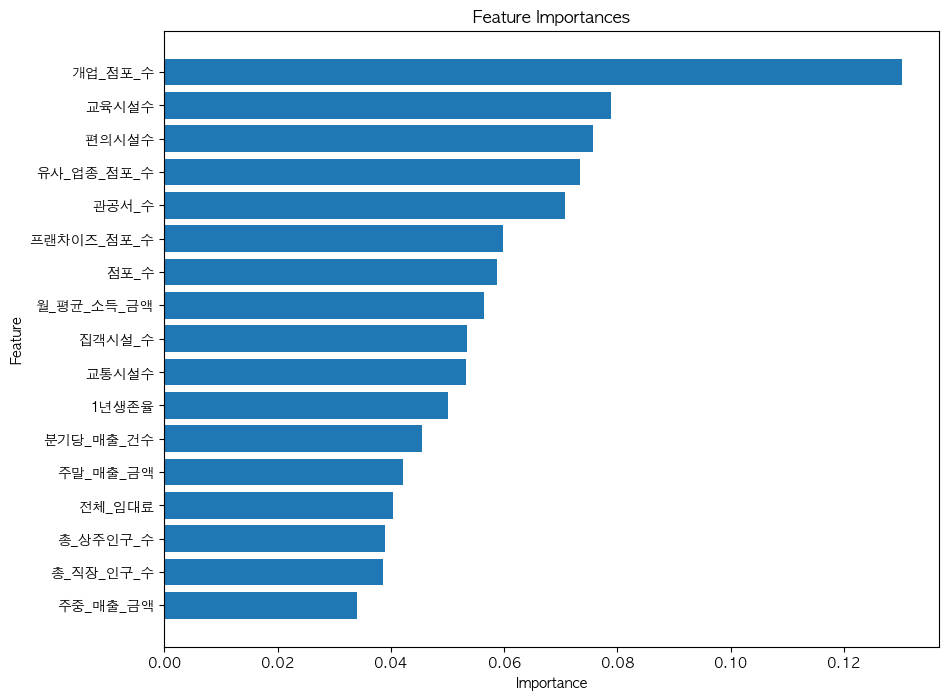

1년생존율: 0.0501
개업_점포_수: 0.1303
관공서_수: 0.0708
교육시설수: 0.0788
교통시설수: 0.0533
분기당_매출_건수: 0.0454
월_평균_소득_금액: 0.0565
유사_업종_점포_수: 0.0733
전체_임대료: 0.0403
점포_수: 0.0587
주말_매출_금액: 0.0421
주중_매출_금액: 0.0340
집객시설_수: 0.0534
총_상주인구_수: 0.0389
총_직장_인구_수: 0.0386
편의시설수: 0.0756
프랜차이즈_점포_수: 0.0598


In [12]:
# 변수 중요도 뽑아내기
feature_importances = model.feature_importances_

# 변수 중요도 시각화
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # y 축 순서를 뒤집기 (상위가 위로 올라오도록)
plt.show()

# 변수 중요도 출력
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance:.4f}")


# 컷오프 (ROC 곡선 을 통한 최적 컷오프 값 지점 찾기)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, confusion_matrix

# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# ROC 곡선 위의 각 점에서의 차이 계산
diffs = tpr - (1 - fpr)

# 최적 컷오프 값 지점 찾기
best_threshold = thresholds[abs(diffs).argmin()]

# 컷오프 값을 선택한 후 예측
y_pred = [1 if prob > best_threshold else 0 for prob in y_pred_prob]

# 정확도 평가
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Using Best Threshold ({best_threshold:.2f}):")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix 출력 및 ROC 곡선 시각화 등 추가 코드 생략


Using Best Threshold (0.67):
Accuracy: 0.5641
F1 Score: 0.5854


# 그리드 서치를 통한 하이퍼 파라미터 조정

In [14]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

# 그리드 서치의 탐색 대상 하이퍼파라미터와 범위 설정
param_grid = {
    'n_estimators': [25, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# XGBoost 모델 생성
model = XGBClassifier(random_state=42)

# 그리드 서치 객체 생성
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터로 모델 훈련
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# 정확도 평가
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best XGBoost Model after Grid Search:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Best XGBoost Model after Grid Search:
Accuracy: 0.5769
F1 Score: 0.6452


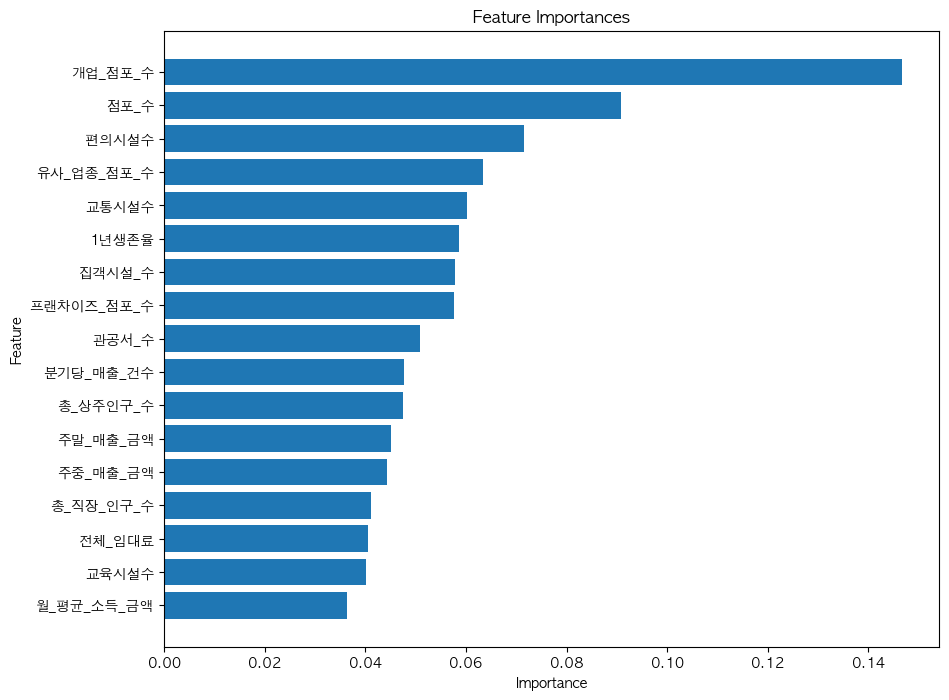

1년생존율: 0.0586
개업_점포_수: 0.1467
관공서_수: 0.0508
교육시설수: 0.0401
교통시설수: 0.0603
분기당_매출_건수: 0.0476
월_평균_소득_금액: 0.0364
유사_업종_점포_수: 0.0634
전체_임대료: 0.0406
점포_수: 0.0909
주말_매출_금액: 0.0450
주중_매출_금액: 0.0443
집객시설_수: 0.0577
총_상주인구_수: 0.0475
총_직장_인구_수: 0.0410
편의시설수: 0.0715
프랜차이즈_점포_수: 0.0576


In [15]:
# 변수 중요도 뽑기
feature_importances = best_model.feature_importances_

# 변수 중요도 시각화
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # y 축 순서를 뒤집기 (상위가 위로 올라오도록)
plt.show()

# 변수 중요도 출력
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance:.4f}")


# 그리드서치를 적용한 모델에 컷오프 과정 진행

In [16]:
# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# ROC 곡선 위의 각 점에서의 차이 계산
diffs = tpr - (1 - fpr)

# 최적 컷오프 값 지점 찾기
best_threshold = thresholds[abs(diffs).argmin()]

# 컷오프 값을 선택한 후 예측
y_pred = [1 if prob > best_threshold else 0 for prob in y_pred_prob]

# 정확도 평가
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Using Best Threshold ({best_threshold:.2f}):")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")




Using Best Threshold (0.68):
Accuracy: 0.5513
F1 Score: 0.5570


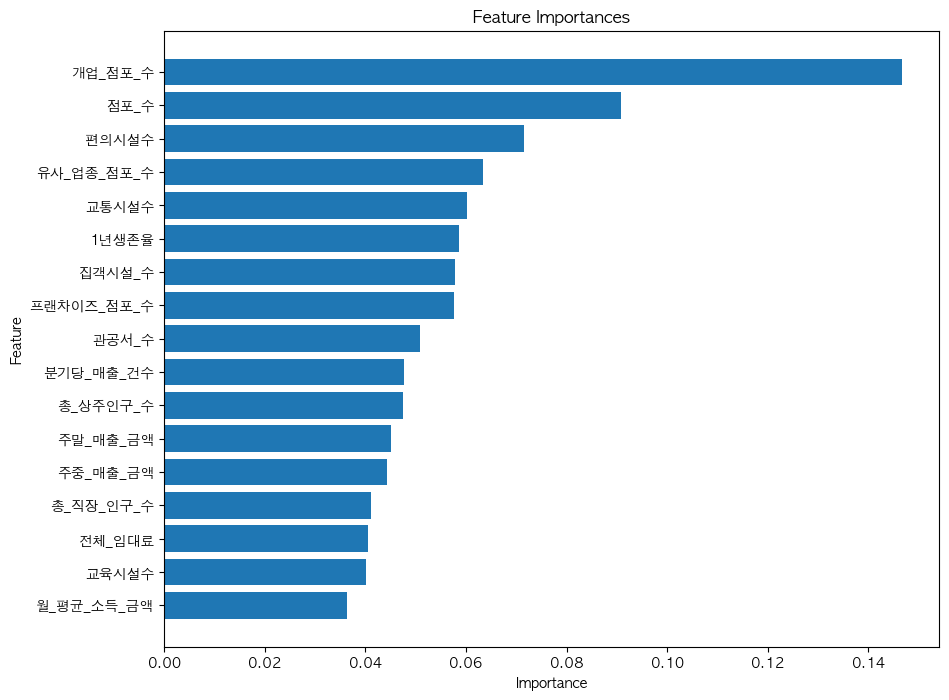

Feature Importances:
       Feature  Importance
1      개업_점포_수    0.146747
9         점포_수    0.090895
15       편의시설수    0.071475
7   유사_업종_점포_수    0.063351
4        교통시설수    0.060263
0        1년생존율    0.058606
12      집객시설_수    0.057735
16  프랜차이즈_점포_수    0.057611
2        관공서_수    0.050834
5    분기당_매출_건수    0.047593
13    총_상주인구_수    0.047524
10    주말_매출_금액    0.044998
11    주중_매출_금액    0.044282
14   총_직장_인구_수    0.041028
8       전체_임대료    0.040562
3        교육시설수    0.040118
6   월_평균_소득_금액    0.036378
Confusion Matrix:
[[21 15]
 [20 22]]


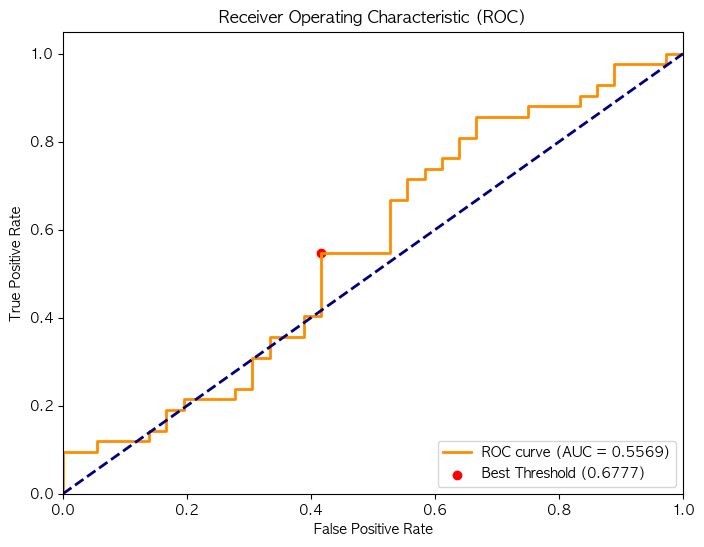

In [17]:

# 변수 중요도 뽑아내기
feature_importances = best_model.feature_importances_

# 변수 중요도 시각화
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # y 축 순서를 뒤집기 (상위가 위로 올라오도록)
plt.show()

# 변수 중요도 출력
print("Feature Importances:")
print(importance_df)

# Confusion Matrix 출력
print("Confusion Matrix:")
print(conf_matrix)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[abs(diffs).argmin()], tpr[abs(diffs).argmin()], c='red', marker='o', label=f'Best Threshold ({best_threshold:.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 기본, 그리드 서치, 컷오프 방법 중 가장 적절한 모델링 기법 선택